In [3]:
import sys                                        
import os                                         
                                                  
os.nice(20)                                       
                                                  
import warnings                                   
warnings.filterwarnings("ignore")                 
from glob import glob         
import uproot
import math
import numpy as np                                
import pandas as pd                               
import matplotlib.pyplot as plt      
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

                                                  
# Local helper script                             
#hnlDIR = os.environ['HNLPATH']                
sys.path.append('./')   
                                                 
from Plotting import *                            
from Dictionary import *                                               

In [2]:
path = "/cvmfs/sbn.osgstorage.org/pnfs/fnal.gov/usr/sbn/persistent/stash/physics-rodrigoa/bnbflux/"
filename = "april07_baseline_199*.root"
folder = 'h101'

branches = [
        "beamwgt"
    , "id"
    , "ini_eng"
    ,'ntp'
]
mom_branches = ['fin_mom']
pos_branches = ['ini_pos']

In [4]:
data_array = []
n = 0

for i in range(1000, 1500):
    filename = "april07_baseline_{}.root".format(i)
    data_array.append(path+filename)#+folder)
    #tree.show()
    n = n +1
#data = np.array(data)
print(data_array)

['/cvmfs/sbn.osgstorage.org/pnfs/fnal.gov/usr/sbn/persistent/stash/physics-rodrigoa/bnbflux/april07_baseline_1000.root', '/cvmfs/sbn.osgstorage.org/pnfs/fnal.gov/usr/sbn/persistent/stash/physics-rodrigoa/bnbflux/april07_baseline_1001.root', '/cvmfs/sbn.osgstorage.org/pnfs/fnal.gov/usr/sbn/persistent/stash/physics-rodrigoa/bnbflux/april07_baseline_1002.root', '/cvmfs/sbn.osgstorage.org/pnfs/fnal.gov/usr/sbn/persistent/stash/physics-rodrigoa/bnbflux/april07_baseline_1003.root', '/cvmfs/sbn.osgstorage.org/pnfs/fnal.gov/usr/sbn/persistent/stash/physics-rodrigoa/bnbflux/april07_baseline_1004.root', '/cvmfs/sbn.osgstorage.org/pnfs/fnal.gov/usr/sbn/persistent/stash/physics-rodrigoa/bnbflux/april07_baseline_1005.root', '/cvmfs/sbn.osgstorage.org/pnfs/fnal.gov/usr/sbn/persistent/stash/physics-rodrigoa/bnbflux/april07_baseline_1006.root', '/cvmfs/sbn.osgstorage.org/pnfs/fnal.gov/usr/sbn/persistent/stash/physics-rodrigoa/bnbflux/april07_baseline_1007.root', '/cvmfs/sbn.osgstorage.org/pnfs/fnal.go

In [7]:
df = pd.DataFrame()

for data in data_array:
    tree = uproot.open(path = "{}:{}".format(data, folder))
    #tree.show()
    
    dfmeson = tree.arrays(branches, library = "pd")
    dfmeson = dfmeson.reset_index()
    dfmeson = dfmeson[dfmeson['subentry'] == 1]
    
    df = pd.concat([df, dfmeson])

In [ ]:
df.to_pickle("bnb_meson_flux.pkl")

<h1>LOAD PKL</h1>

In [1]:
import pickle 
file = open("./bnb_meson_flux.pkl", 'rb')
df = pickle.load(file)

In [2]:
simPOT = 1 * 10000 #10000POT per file
totalPOT = 10 * 10**20
print(simPOT)
print(totalPOT)

10000
1000000000000000000000


In [4]:
label = df['id'].unique()

label = sorted(label)
print(label)

[5, 6, 8, 9, 10, 11, 12]


In [5]:
label_dict = {
    #https://internal.dunescience.org/doxygen/namespacegenie_1_1pdg.html
    5: r'$\mu^{+}$'
    ,6: r'$\mu^{-}$'
    ,8: r'$\pi^{+}$'
    ,9: r'$\pi^{-}$'
    ,10: r'$K^{0}_{L}$'
    ,11: r'$K^{+}$'
    ,12: r'$K^{-}$'
    ,16: r'$K^{0}_{S}$'
}

col_label_dict = {
    5: col_dict['Teal']
    ,6: col_dict['SkyBlue']
    ,8: col_dict['MintGreen']
    ,9: col_dict['PastelGreen']
    ,10: col_dict['Lavender']
    ,11: col_dict['Flamingo']
    ,12: col_dict['Peach']
    ,16: col_dict['SlateGray']
}


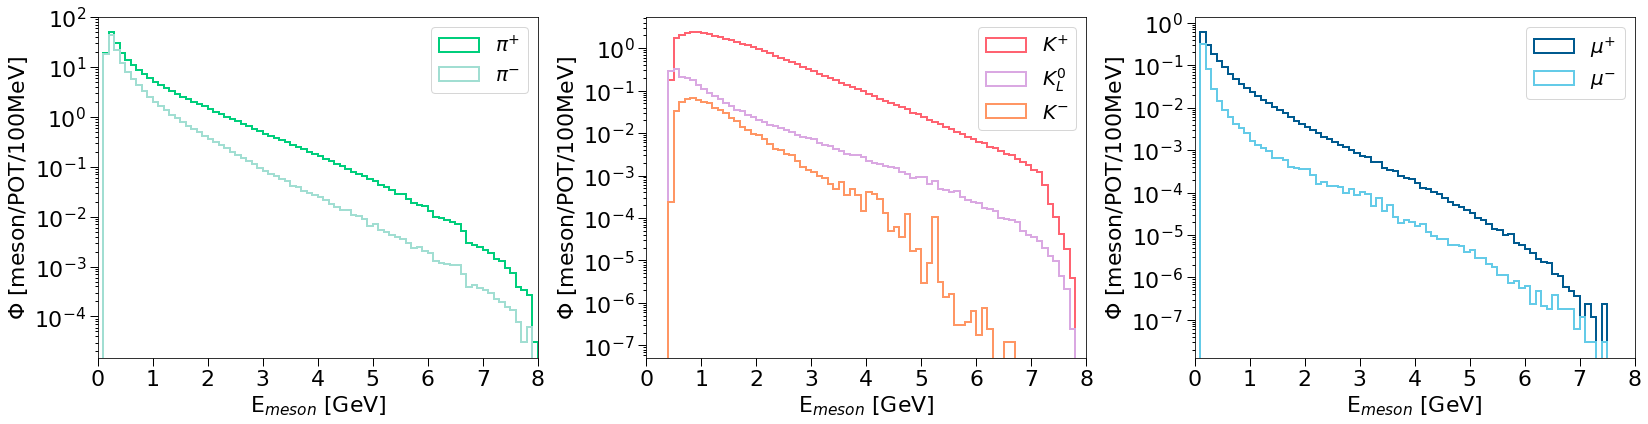

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (23,6))

xmin=0
xmax=8
xnbin=80
xlimmin = xmin
xlimmax = xmax
ytitle = r"$\Phi$ [meson/POT/100MeV]"
xtitle = "E$_{meson}$ [GeV]"
#-------------------------------------------------------#
for l in [8,9]:
    pltdf = df['ini_eng'][df['id'] == l] 
    w = df['beamwgt'][df['id'] == l] / simPOT

    plot_1dhist(
            pltdf,
            ax1,
            xmin, xmax, xnbin,
            xlimmin, xlimmax,
            weights = w,
            histtype = 'step',
            linecolor = col_label_dict[l], 
            linewidth = 2,
            ytitle = ytitle, xtitle = xtitle,
            label = label_dict[l], 
            fontsize = 22,
            iflabelbox = True
            )
#-------------------------------------------------------#    
for l in [11,10,12]:
    pltdf = df['ini_eng'][df['id'] == l]
    w = df['beamwgt'][df['id'] == l] / simPOT

    plot_1dhist(
            pltdf,
            ax2,
            xmin, xmax, xnbin,
            xlimmin, xlimmax,
            weights = w,
            histtype = 'step',
            linecolor = col_label_dict[l], 
            linewidth = 2,
            ytitle = ytitle, xtitle = xtitle,
            label = label_dict[l],
            fontsize = 22,
            iflabelbox = True
            )
#-------------------------------------------------------#
for l in [5,6]:
    pltdf = df['ini_eng'][df['id'] == l]
    w = df['beamwgt'][df['id'] == l] / simPOT

    plot_1dhist(
            pltdf,
            ax3,
            xmin, xmax, xnbin,
            xlimmin, xlimmax,
            weights = w,
            histtype = 'step',
            linecolor = col_label_dict[l], 
            linewidth = 2,
            ytitle = ytitle, xtitle = xtitle,
            label = label_dict[l], 
            fontsize = 22,
            iflabelbox = True
            )
#-------------------------------------------------------#
ax1.yaxis.offsetText.set_fontsize(16)
ax2.yaxis.offsetText.set_fontsize(16)
ax3.yaxis.offsetText.set_fontsize(16)

ax1.tick_params(bottom = True, top = False, left = True, right = False)
ax2.tick_params(bottom = True, top = False, left = True, right = False)
ax3.tick_params(bottom = True, top = False, left = True, right = False)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.xaxis.set_major_locator(MaxNLocator(8))
ax1.yaxis.get_major_locator().set_params(numticks=99)
ax1.yaxis.get_minor_locator().set_params(numticks=99)#, subs=[.2, .4, .6, .8])

ax2.xaxis.set_major_locator(MaxNLocator(8))
ax2.yaxis.get_major_locator().set_params(numticks=99)
ax2.yaxis.get_minor_locator().set_params(numticks=99)#, subs=[.2, .4, .6, .8])

ax3.xaxis.set_major_locator(MaxNLocator(8))
ax3.yaxis.get_major_locator().set_params(numticks=99)
ax3.yaxis.get_minor_locator().set_params(numticks=99)#, subs=[.2, .4, .6, .8])
#-------------------------------------------------------#
fig.tight_layout()
fig.savefig("./BNB_Meson_Flux.png", dpi=200)
plt.show()

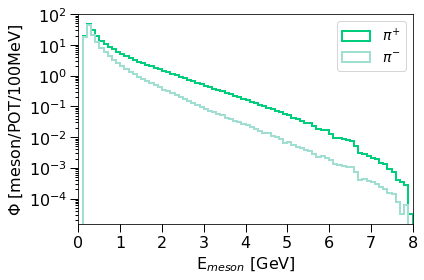

In [12]:
fig, (ax1) = plt.subplots(1,1, figsize = (6,4))

xmin=0
xmax=8
xnbin=80
xlimmin = xmin
xlimmax = xmax
ytitle = r"$\Phi$ [meson/POT/100MeV]"
xtitle = "E$_{meson}$ [GeV]"
#-------------------------------------------------------#
for l in [8,9]:
    pltdf = df['ini_eng'][df['id'] == l] 
    w = df['beamwgt'][df['id'] == l] / simPOT

    plot_1dhist(
            pltdf,
            ax1,
            xmin, xmax, xnbin,
            xlimmin, xlimmax,
            weights = w,
            histtype = 'step',
            linecolor = col_label_dict[l], 
            linewidth = 2,
            ytitle = ytitle, xtitle = xtitle,
            label = label_dict[l], 
            fontsize = 16,
            iflabelbox = True
            )

#-------------------------------------------------------#
ax1.yaxis.offsetText.set_fontsize(16)

ax1.tick_params(bottom = True, top = False, left = True, right = False)

ax1.set_yscale('log')

ax1.xaxis.set_major_locator(MaxNLocator(8))
ax1.yaxis.get_major_locator().set_params(numticks=99)
ax1.yaxis.get_minor_locator().set_params(numticks=99)#, subs=[.2, .4, .6, .8])

#-------------------------------------------------------#
fig.tight_layout()
fig.savefig("./BNB_Meson_Pion_Flux.png", dpi=200)
plt.show()

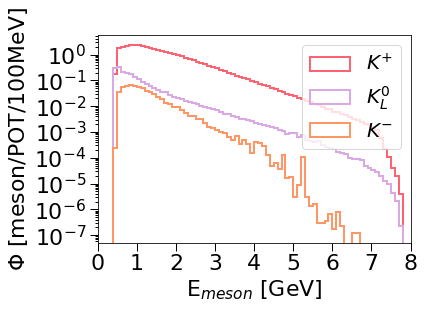

In [10]:
fig, (ax1) = plt.subplots(1,1, figsize = (6,4))

xmin=0
xmax=8
xnbin=80
xlimmin = xmin
xlimmax = xmax
ytitle = r"$\Phi$ [meson/POT/100MeV]"
xtitle = "E$_{meson}$ [GeV]"
#-------------------------------------------------------#    
for l in [11,10,12]:
    pltdf = df['ini_eng'][df['id'] == l]
    w = df['beamwgt'][df['id'] == l] / simPOT

    plot_1dhist(
            pltdf,
            ax1,
            xmin, xmax, xnbin,
            xlimmin, xlimmax,
            weights = w,
            histtype = 'step',
            linecolor = col_label_dict[l], 
            linewidth = 2,
            ytitle = ytitle, xtitle = xtitle,
            label = label_dict[l],
            fontsize = 22,
            iflabelbox = True
            )
#-------------------------------------------------------#
ax1.yaxis.offsetText.set_fontsize(16)

ax1.tick_params(bottom = True, top = False, left = True, right = False)

ax1.set_yscale('log')

ax1.xaxis.set_major_locator(MaxNLocator(8))
ax1.yaxis.get_major_locator().set_params(numticks=99)
ax1.yaxis.get_minor_locator().set_params(numticks=99)#, subs=[.2, .4, .6, .8])

#-------------------------------------------------------#
fig.tight_layout()
fig.savefig("./BNB_Meson_Kaon_Flux.png", dpi=200)
plt.show()

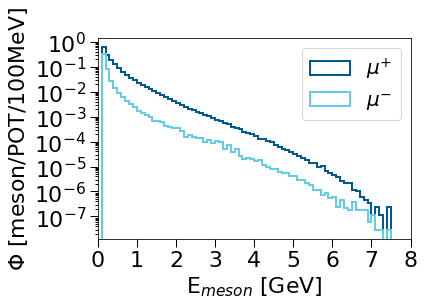

In [11]:
fig, (ax1) = plt.subplots(1,1, figsize = (6,4))

xmin=0
xmax=8
xnbin=80
xlimmin = xmin
xlimmax = xmax
ytitle = r"$\Phi$ [meson/POT/100MeV]"
xtitle = "E$_{meson}$ [GeV]"
#-------------------------------------------------------#    
for l in [5,6]:
    pltdf = df['ini_eng'][df['id'] == l]
    w = df['beamwgt'][df['id'] == l] / simPOT

    plot_1dhist(
            pltdf,
            ax1,
            xmin, xmax, xnbin,
            xlimmin, xlimmax,
            weights = w,
            histtype = 'step',
            linecolor = col_label_dict[l], 
            linewidth = 2,
            ytitle = ytitle, xtitle = xtitle,
            label = label_dict[l],
            fontsize = 22,
            iflabelbox = True
            )
#-------------------------------------------------------#
ax1.yaxis.offsetText.set_fontsize(16)

ax1.tick_params(bottom = True, top = False, left = True, right = False)

ax1.set_yscale('log')

ax1.xaxis.set_major_locator(MaxNLocator(8))
ax1.yaxis.get_major_locator().set_params(numticks=99)
ax1.yaxis.get_minor_locator().set_params(numticks=99)#, subs=[.2, .4, .6, .8])

#-------------------------------------------------------#
fig.tight_layout()
fig.savefig("./BNB_Meson_Muon_Flux.png", dpi=200)
plt.show()